## import necessary libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Read dataset

In [78]:
# Set seaborn style for better visuals
sns.set(style="whitegrid")
df = pd.read_csv('survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## Data Mining

In [79]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))


Descriptive Statistics:
                  Timestamp           Age Gender        Country state  \
count                  1259  1.259000e+03   1259           1259   744   
unique                 1246           NaN     49             48    45   
top     2014-08-27 12:43:28           NaN   Male  United States    CA   
freq                      2           NaN    615            751   138   
mean                    NaN  7.942815e+07    NaN            NaN   NaN   
std                     NaN  2.818299e+09    NaN            NaN   NaN   
min                     NaN -1.726000e+03    NaN            NaN   NaN   
25%                     NaN  2.700000e+01    NaN            NaN   NaN   
50%                     NaN  3.100000e+01    NaN            NaN   NaN   
75%                     NaN  3.600000e+01    NaN            NaN   NaN   
max                     NaN  1.000000e+11    NaN            NaN   NaN   

       self_employed family_history treatment work_interfere no_employees  \
count           1241 

####  Key Insights Extraction

In [80]:
#  Prevalence of Mental Health Interference
interference_counts = df['work_interfere'].value_counts(normalize=True) * 100
print("\nPercentage of Work Interference:")
print(interference_counts)


Percentage of Work Interference:
work_interfere
Sometimes    46.733668
Never        21.407035
Rarely       17.386935
Often        14.472362
Name: proportion, dtype: float64


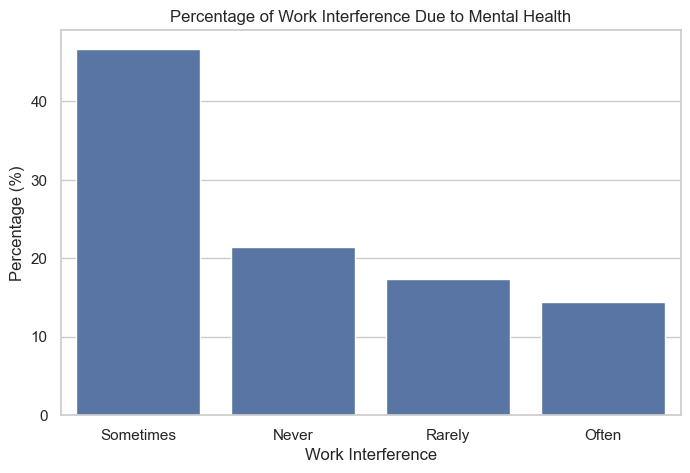

In [81]:
plt.figure(figsize=(8, 5))
sns.barplot(x=interference_counts.index, y=interference_counts.values)
plt.title('Percentage of Work Interference Due to Mental Health')
plt.xlabel('Work Interference')
plt.ylabel('Percentage (%)')
plt.show()

#### Treatment Seeking Behavior

In [82]:
treatment_counts = df['treatment'].value_counts(normalize=True) * 100
print("\nPercentage Seeking Treatment:")
print(treatment_counts)


Percentage Seeking Treatment:
treatment
Yes    50.595711
No     49.404289
Name: proportion, dtype: float64


#### Cross-tabulation with Family History

In [83]:
treatment_vs_family = pd.crosstab(df['treatment'], df['family_history'], normalize='index') * 100
print("\nTreatment vs. Family History (%):")
print(treatment_vs_family)


Treatment vs. Family History (%):
family_history         No        Yes
treatment                           
No              79.581994  20.418006
Yes             42.700157  57.299843


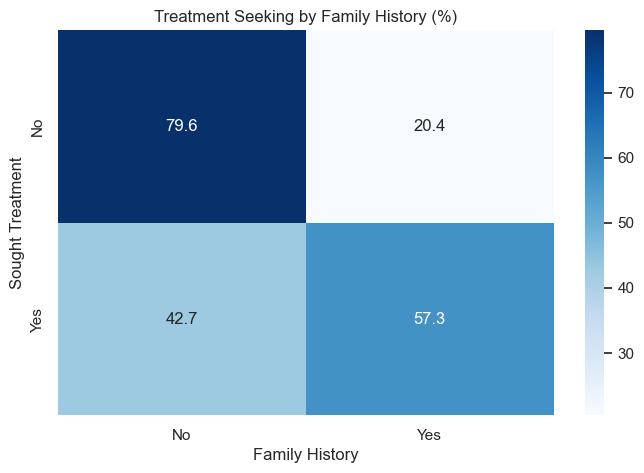

In [84]:
plt.figure(figsize=(8, 5))
sns.heatmap(treatment_vs_family, annot=True, cmap='Blues', fmt='.1f')
plt.title('Treatment Seeking by Family History (%)')
plt.xlabel('Family History')
plt.ylabel('Sought Treatment')
plt.show()

#### Workplace Support Perception

In [85]:
mental_consequence_counts = df['mental_health_consequence'].value_counts(normalize=True) * 100
print("\nPerceived Mental Health Consequence (%):")
print(mental_consequence_counts)


Perceived Mental Health Consequence (%):
mental_health_consequence
No       38.919778
Maybe    37.887212
Yes      23.193010
Name: proportion, dtype: float64


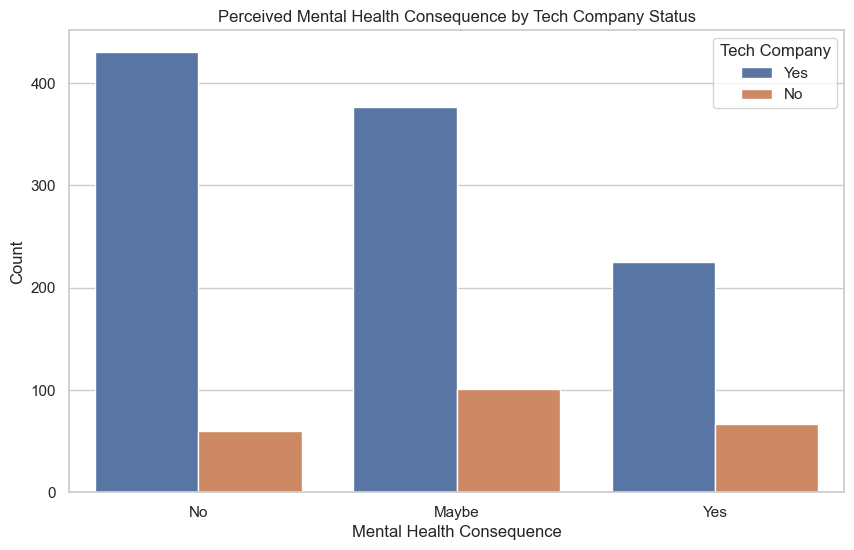

In [86]:
plt.figure(figsize=(10, 6))
sns.countplot(x='mental_health_consequence', hue='tech_company', data=df)
plt.title('Perceived Mental Health Consequence by Tech Company Status')
plt.xlabel('Mental Health Consequence')
plt.ylabel('Count')
plt.legend(title='Tech Company')
plt.show()

#### Correlation Analysis


Correlation Matrix:
                                Age  work_interfere  treatment  \
Age                        1.000000       -0.027425   0.027860   
work_interfere            -0.027425        1.000000  -0.035881   
treatment                  0.027860       -0.035881   1.000000   
family_history             0.035203        0.017420   0.377918   
mental_health_consequence  0.042128       -0.024745   0.030221   
no_employees              -0.045109        0.025174  -0.050114   

                           family_history  mental_health_consequence  \
Age                              0.035203                   0.042128   
work_interfere                   0.017420                  -0.024745   
treatment                        0.377918                   0.030221   
family_history                   1.000000                   0.028196   
mental_health_consequence        0.028196                   1.000000   
no_employees                    -0.053635                  -0.011370   

           

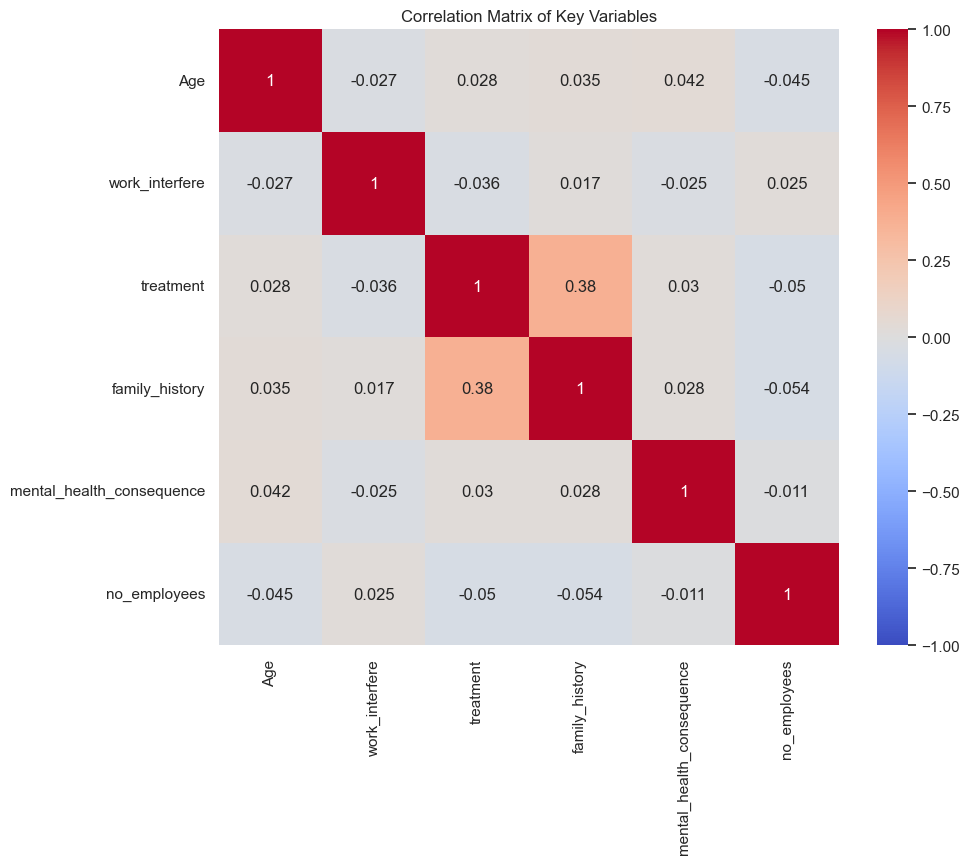

In [87]:
# Encode categorical variables for correlation
le = LabelEncoder()
encoded_df = df[['Age', 'work_interfere', 'treatment', 'family_history', 
                 'mental_health_consequence', 'no_employees']].copy()

# Encode categorical columns
for col in ['work_interfere', 'treatment', 'family_history', 'mental_health_consequence', 'no_employees']:
    encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))

# Compute correlation matrix
corr_matrix = encoded_df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Key Variables')
plt.show()

#### Clustering

In [88]:
# Select features for clustering
cluster_features = encoded_df[['Age', 'work_interfere', 'treatment', 'family_history']]
cluster_features = cluster_features.dropna()

# Determine optimal number of clusters using Elbow Method
inertia = []
silhouette_scores = []
k_range = range(2, 6)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(cluster_features, kmeans.labels_))

#### Plot Elbow Curve

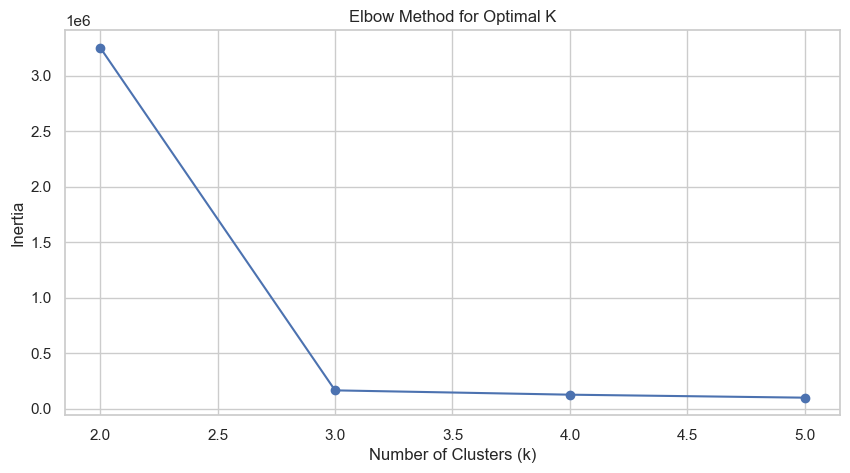

In [89]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Plot Silhouette Scores

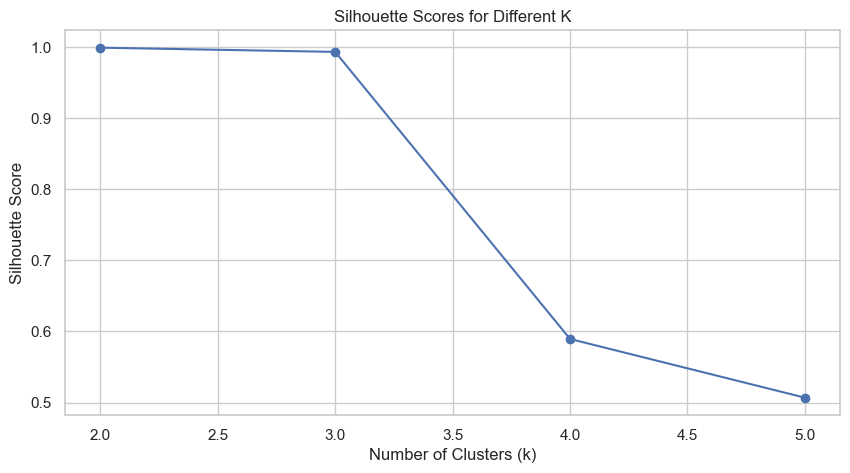

In [90]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

### Apply KMeans with optimal k (e.g., 3, adjust based on plots)


Cluster Distribution:
Cluster
0    1257
1       1
2       1
Name: count, dtype: int64


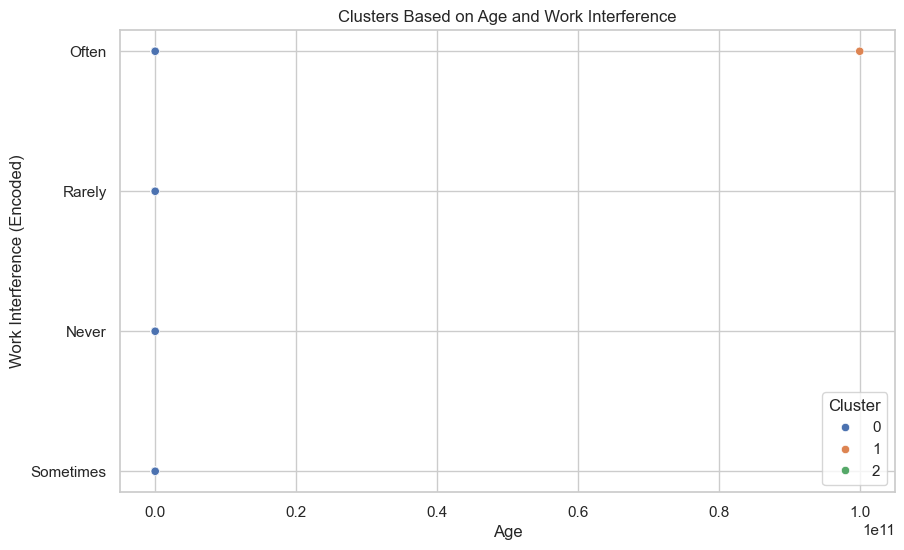

In [91]:
optimal_k = 3  # Example, adjust based on elbow/silhouette results
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(cluster_features)
df['Cluster'] = pd.Series(cluster_labels, index=cluster_features.index)

# Analyze Clusters
print("\nCluster Distribution:")
print(df['Cluster'].value_counts())

# Visualize Clusters (example with Age and Work Interference)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='work_interfere', hue='Cluster', data=df, palette='deep')
plt.title('Clusters Based on Age and Work Interference')
plt.xlabel('Age')
plt.ylabel('Work Interference (Encoded)')
plt.show()

# Data cleaning

### Handle Missing Values

In [92]:
# Replace "NA" with NaN
df.replace("NA", np.nan, inplace=True)

# Check missing value counts
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Drop rows where critical columns are missing (e.g., 'work_interfere', 'treatment')
df.dropna(subset=['work_interfere', 'treatment'], inplace=True)


Missing Values per Column:
Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
Cluster                         0
dtype: int64


#### Clean 'Age' Column

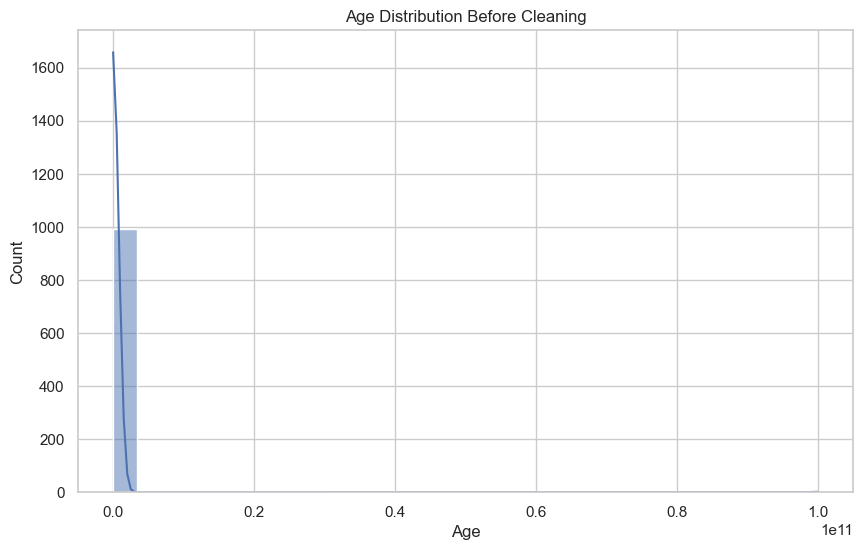

In [93]:
# Convert to numeric, coercing errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Visualize initial age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution Before Cleaning')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Filter out invalid ages (e.g., < 0 or > 100)

In [94]:
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]

#### Impute missing ages with median

C:\Users\Acer\AppData\Local\Temp\ipykernel_13120\3362438594.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)


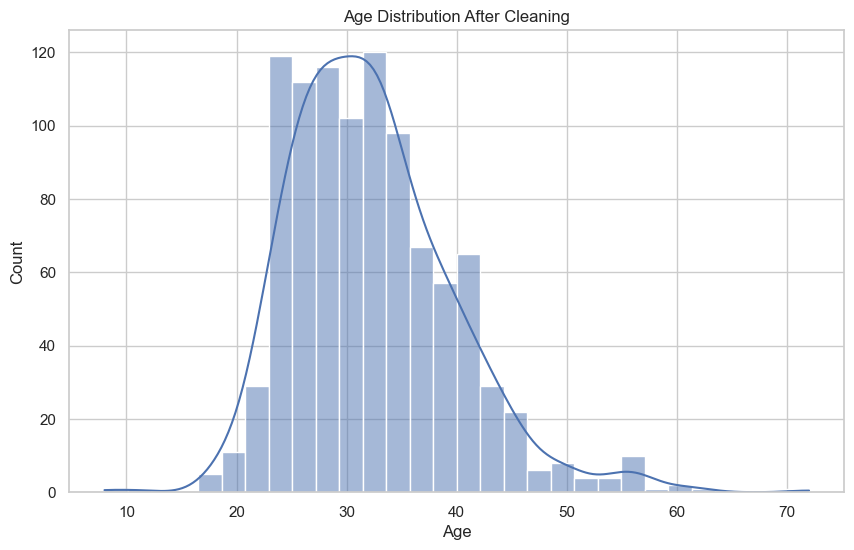

In [95]:
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# Visualize cleaned age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution After Cleaning')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Clean 'Gender' Column

In [96]:
# Standardize gender entries
def clean_gender(gender):
    if pd.isna(gender):
        return 'Unknown'
    gender = str(gender).lower().strip()
    if 'male' in gender or gender in ['m', 'maile', 'cis male']:
        return 'Male'
    elif 'female' in gender or gender in ['f', 'femail', 'cis female', 'woman']:
        return 'Female'
    else:
        return 'Other'  # For non-binary, trans, or unique responses

df['Gender'] = df['Gender'].apply(clean_gender)

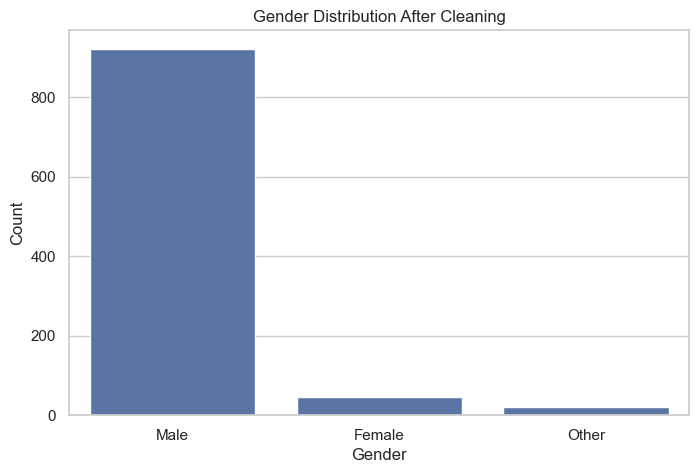

In [97]:
# Visualize gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution After Cleaning')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### Handle Categorical Columns

In [98]:
# Replace "Don't know" with NaN in relevant columns
categorical_cols = ['benefits', 'care_options', 'wellness_program', 'seek_help', 
                    'anonymity', 'leave', 'mental_health_consequence', 
                    'phys_health_consequence', 'mental_vs_physical']
df[categorical_cols] = df[categorical_cols].replace("Don't know", np.nan)

#### Convert Timestamp to Datetime

In [99]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

#### Check for Duplicates

In [100]:
print("\nDuplicate Rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Duplicate Rows: 0
